**GoodBelly Case Study: Using Statistics to Justify the Marketing Expense**

**Problem Statement:** At the senior manager meeting in July of 2010, GoodBelly management expressed concerns about the promotional budget and asked Marty Wellbeing, GoodBelly’s marketing manager, to justify the demo and
endcap activities. GoodBelly’s Chief Financial Officer Maggie Mathedoittir, would expect recommendations to be firmly backed with statistical data.


**Approach:** We are concerned about determining the promotional driver variable for the sale of GoodBelly products. This is the case of prediction rather than projection where we are more interested in predicting the key promotional driver variables and their impact rather than forcasting the results.

First we will list down the potential reasons for the impact of promotions on GoodBelly products.


**The potential reasons could be:**

Date	Region	Store	Units Sold	Average Retail Price	Sales Rep	Endcap	Demo	Demo1-3	Demo4-5	Natural	Fitness

1. The price of GoodBelly products compared to their competitors.
2. Presence of a sales representative in the store to promote their products.
3. Number of Endcap displays in the stores.
4. Frequency of demos conducted and samples distributed by the sales representatives.
5. Number of Natural Retail stores with in 5 mile radius
6. Number of fitness centers with in 5 mile radius


**Import Packages and Data Upload**

In [79]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#from google.colab import files
#upload = files.upload()

In [80]:
goodbelly = pd.read_csv('GoodBellyData.csv')
goodbelly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1386 non-null   object 
 1   Region                1243 non-null   object 
 2   Store                 1386 non-null   object 
 3   Units Sold            1386 non-null   float64
 4   Average Retail Price  1386 non-null   float64
 5   Sales Rep             1386 non-null   int64  
 6   Endcap                1386 non-null   int64  
 7   Demo                  1386 non-null   int64  
 8   Demo1-3               1386 non-null   int64  
 9   Demo4-5               1386 non-null   int64  
 10  Natural               1386 non-null   int64  
 11  Fitness               1386 non-null   int64  
 12  Unnamed: 12           0 non-null      float64
 13  Unnamed: 13           0 non-null      float64
 14  Unnamed: 14           0 non-null      float64
 15  Unnamed: 15          

**Drop unwanted variables that are blank**

In [81]:
goodbelly = goodbelly.drop(['Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40'], axis=1)
goodbelly.head()

,Date,Region,Store,Units Sold,Average Retail Price,Sales Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness
0,5/4/2010,FL,Biscayne (aka Aventura),150.702088,4.390000,0,0,0,0,0,1,0
1,5/11/2010,FL,Biscayne (aka Aventura),197.403797,3.997692,0,0,0,0,0,1,0
2,5/18/2010,FL,Biscayne (aka Aventura),235.106171,3.809231,0,0,0,0,0,1,0
3,5/25/2010,FL,Biscayne (aka Aventura),226.692427,3.835000,0,0,0,0,0,1,0
4,6/1/2010,FL,Biscayne (aka Aventura),257.688151,3.902500,0,0,0,0,0,1,0


In [82]:
goodbelly.shape

(1386, 12)

In [83]:
goodbelly.info()
# observe the data types of each variable and notice the date is not a date type
# and we have to convert it in to a datatime data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1386 non-null   object 
 1   Region                1243 non-null   object 
 2   Store                 1386 non-null   object 
 3   Units Sold            1386 non-null   float64
 4   Average Retail Price  1386 non-null   float64
 5   Sales Rep             1386 non-null   int64  
 6   Endcap                1386 non-null   int64  
 7   Demo                  1386 non-null   int64  
 8   Demo1-3               1386 non-null   int64  
 9   Demo4-5               1386 non-null   int64  
 10  Natural               1386 non-null   int64  
 11  Fitness               1386 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 130.1+ KB


**Get the overall statistical view of the dataset**

In [84]:
goodbelly.describe()
# We find various statistical data of the data set.

,Units Sold,Average Retail Price,Sales Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,253.820718,4.107093,0.549784,0.038240,0.058442,0.156566,0.075758,1.448773,2.476190
std,110.998731,0.463828,0.497695,0.191843,0.234661,0.363522,0.264705,0.975092,1.592789
min,47.559852,2.889286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189.995471,3.775714,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,236.735266,4.096667,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,295.804391,4.425067,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
max,1041.200256,6.251538,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000


**Find if there are any Null values in the variables**

In [85]:
# Check if there is any NaN value inside the dataset
goodbelly.isnull().sum()*100/goodbelly.shape[0]

# Below the region NA is showing as the NaN value which can be ignored

Date                     0.00000
Region                  10.31746
Store                    0.00000
Units Sold               0.00000
Average Retail Price     0.00000
Sales Rep                0.00000
Endcap                   0.00000
Demo                     0.00000
Demo1-3                  0.00000
Demo4-5                  0.00000
Natural                  0.00000
Fitness                  0.00000
dtype: float64

**Outlier Analysis**

C:\Users\Sanjo George\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Sanjo George\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Sanjo George\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Sanjo George\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be remo

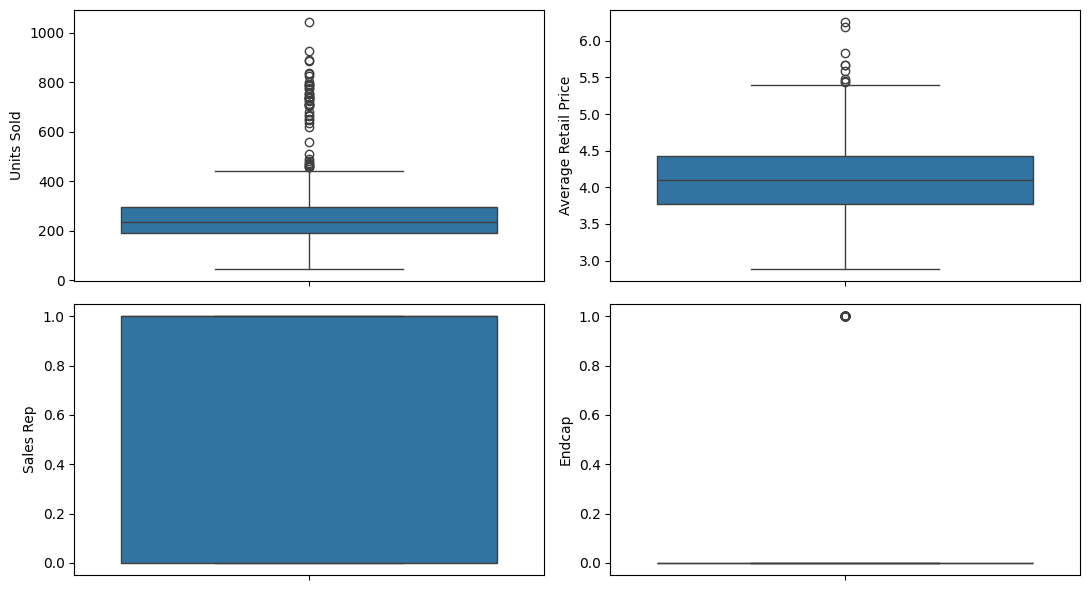

In [86]:
# create boxplots for the variables to identify the outliers
# Units Sold,	Average Retail Price,	Sales Rep,	Endcap,	Demo,	Demo1-3,	Demo4-5,	Natural,	Fitness

fig, axs = plt.subplots(2,2, figsize=(11,6))
plt1 = sns.boxplot(goodbelly['Units Sold'], ax=axs[0,0])
plt2 = sns.boxplot(goodbelly['Average Retail Price'], ax=axs[0,1])
plt3 = sns.boxplot(goodbelly['Sales Rep'], ax=axs[1,0])
plt4 = sns.boxplot(goodbelly['Endcap'], ax=axs[1,1])
plt.tight_layout()

**Convert the date format from Object to DateTime to use it in modeling**

In [87]:
# Convert the date format from object to datetime format (YYYY-MM-DD)

goodbelly['Date'] = pd.to_datetime(goodbelly['Date'],dayfirst=False)
goodbelly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1386 non-null   datetime64[ns]
 1   Region                1243 non-null   object        
 2   Store                 1386 non-null   object        
 3   Units Sold            1386 non-null   float64       
 4   Average Retail Price  1386 non-null   float64       
 5   Sales Rep             1386 non-null   int64         
 6   Endcap                1386 non-null   int64         
 7   Demo                  1386 non-null   int64         
 8   Demo1-3               1386 non-null   int64         
 9   Demo4-5               1386 non-null   int64         
 10  Natural               1386 non-null   int64         
 11  Fitness               1386 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(2)
memory usage: 130.1+ K

In [88]:
goodbelly.head()

,Date,Region,Store,Units Sold,Average Retail Price,Sales Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness
0,2010-05-04,FL,Biscayne (aka Aventura),150.702088,4.390000,0,0,0,0,0,1,0
1,2010-05-11,FL,Biscayne (aka Aventura),197.403797,3.997692,0,0,0,0,0,1,0
2,2010-05-18,FL,Biscayne (aka Aventura),235.106171,3.809231,0,0,0,0,0,1,0
3,2010-05-25,FL,Biscayne (aka Aventura),226.692427,3.835000,0,0,0,0,0,1,0
4,2010-06-01,FL,Biscayne (aka Aventura),257.688151,3.902500,0,0,0,0,0,1,0


**Create log(Average Retail Price)**

Create additional column which is the log of the Average Retail Price to make data more "normal", or symmetric. If we're performing a statistical analysis that assumes normality, a log transformation might help us meet this assumption. Another reason is to help meet the assumption of constant variance in the context of linear modeling.

In [89]:
goodbelly['Log_AvgRtlPrice'] = np.log(goodbelly['Average Retail Price'])
goodbelly['Day_of_week'] = goodbelly['Date'].dt.weekday
goodbelly.head()

,Date,Region,Store,Units Sold,Average Retail Price,Sales Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness,Log_AvgRtlPrice,Day_of_week
0,2010-05-04,FL,Biscayne (aka Aventura),150.702088,4.390000,0,0,0,0,0,1,0,1.479329,1
1,2010-05-11,FL,Biscayne (aka Aventura),197.403797,3.997692,0,0,0,0,0,1,0,1.385717,1
2,2010-05-18,FL,Biscayne (aka Aventura),235.106171,3.809231,0,0,0,0,0,1,0,1.337427,1
3,2010-05-25,FL,Biscayne (aka Aventura),226.692427,3.835000,0,0,0,0,0,1,0,1.344169,1
4,2010-06-01,FL,Biscayne (aka Aventura),257.688151,3.902500,0,0,0,0,0,1,0,1.361617,1


**Introduce a Lag_Sales variable**

Sales of today affects the sales of tomorrow. So to take that into account we will create a lag variable of sales.

In [90]:
goodbelly['Lag_Sales'] = np.roll(goodbelly['Units Sold'],1)
goodbelly.Lag_Sales[0]=0
goodbelly.head()

C:\Users\Sanjo George\AppData\Local\Temp\ipykernel_21496\1450444481.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  goodbelly.Lag_Sales[0]=0
C:\Users\Sanjo George\AppData\Local\Temp\ipykernel_21496\1450444481.py:2: SettingWithCopyWarning

,Date,Region,Store,Units Sold,Average Retail Price,Sales Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness,Log_AvgRtlPrice,Day_of_week,Lag_Sales
0,2010-05-04,FL,Biscayne (aka Aventura),150.702088,4.390000,0,0,0,0,0,1,0,1.479329,1,0.000000
1,2010-05-11,FL,Biscayne (aka Aventura),197.403797,3.997692,0,0,0,0,0,1,0,1.385717,1,150.702088
2,2010-05-18,FL,Biscayne (aka Aventura),235.106171,3.809231,0,0,0,0,0,1,0,1.337427,1,197.403797
3,2010-05-25,FL,Biscayne (aka Aventura),226.692427,3.835000,0,0,0,0,0,1,0,1.344169,1,235.106171
4,2010-06-01,FL,Biscayne (aka Aventura),257.688151,3.902500,0,0,0,0,0,1,0,1.361617,1,226.692427


In [91]:
goodbelly_numeric = goodbelly.drop(['Region', 'Store'], axis=1)
goodbelly_numeric.head()

,Date,Units Sold,Average Retail Price,Sales Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness,Log_AvgRtlPrice,Day_of_week,Lag_Sales
0,2010-05-04,150.702088,4.390000,0,0,0,0,0,1,0,1.479329,1,0.000000
1,2010-05-11,197.403797,3.997692,0,0,0,0,0,1,0,1.385717,1,150.702088
2,2010-05-18,235.106171,3.809231,0,0,0,0,0,1,0,1.337427,1,197.403797
3,2010-05-25,226.692427,3.835000,0,0,0,0,0,1,0,1.344169,1,235.106171
4,2010-06-01,257.688151,3.902500,0,0,0,0,0,1,0,1.361617,1,226.692427


**Create scatterplots**

Scatter plots to get a view of the correlation between Units sold and all other variables

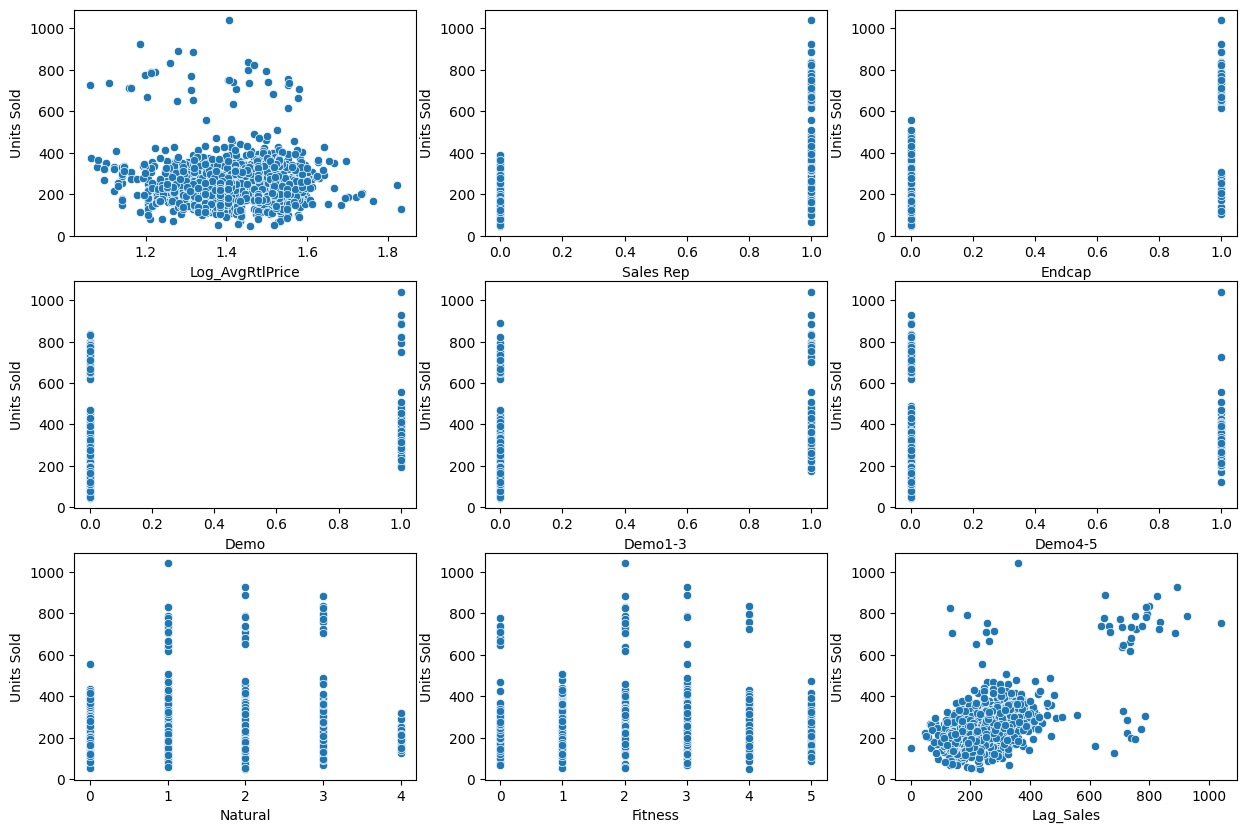

In [92]:
fig, axs =plt.subplots(3,3,figsize=(15,10)) # creates empty graph with the scales
# with the defined parameters
plt1 = sns.scatterplot(data = goodbelly, x='Log_AvgRtlPrice', y='Units Sold', ax= axs[0,0])
plt2 = sns.scatterplot(data = goodbelly, x='Sales Rep', y='Units Sold', ax= axs[0,1])
plt3 = sns.scatterplot(data = goodbelly, x='Endcap', y='Units Sold', ax= axs[0,2])
plt4 = sns.scatterplot(data = goodbelly, x='Demo', y='Units Sold', ax= axs[1,0])
plt5 = sns.scatterplot(data = goodbelly, x='Demo1-3', y='Units Sold', ax= axs[1,1])
plt6 = sns.scatterplot(data = goodbelly, x='Demo4-5', y='Units Sold', ax= axs[1,2])
plt7 = sns.scatterplot(data = goodbelly, x='Natural', y='Units Sold', ax= axs[2,0])
plt8 = sns.scatterplot(data = goodbelly, x='Fitness', y='Units Sold', ax= axs[2,1])
plt9 = sns.scatterplot(data = goodbelly, x='Lag_Sales', y='Units Sold', ax= axs[2,2])

**Heatmap of the dataset**

Heatmap gives us the exact correlation between all the variables

<Axes: >

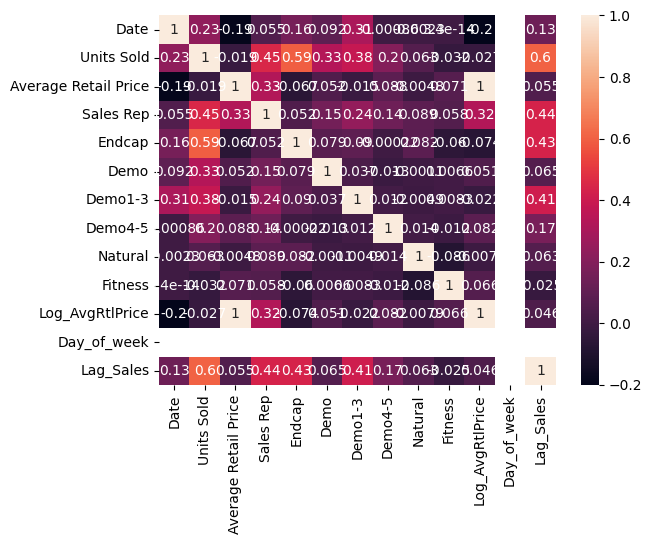

In [93]:
sns.heatmap(goodbelly_numeric.corr(), annot=True)

**Analyze the Units Sold against other Variables**

C:\Users\Sanjo George\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Units Sold'>

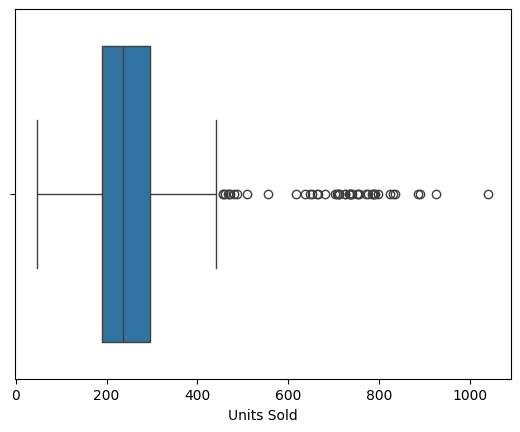

In [94]:
sns.boxplot(goodbelly['Units Sold'], orient = 'h')

**Sales Rep Vs Units Sold**

<Axes: xlabel='Sales Rep', ylabel='Units Sold'>

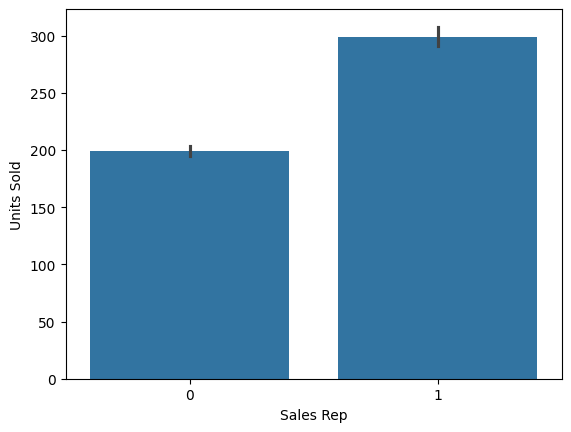

In [95]:
sns.barplot(data=goodbelly, x='Sales Rep', y='Units Sold')
# The below barplot shows when there is a sales rep then the weekly sale

**Average Retail Price Vs Units Sold**

<Axes: xlabel='Average Retail Price', ylabel='Units Sold'>

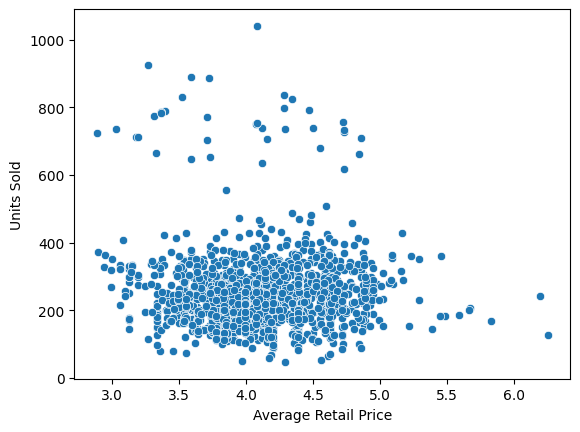

In [96]:
sns.scatterplot(data=goodbelly, x='Average Retail Price', y='Units Sold')

**Endcap Vs Units Sold**

<Axes: xlabel='Endcap', ylabel='Units Sold'>

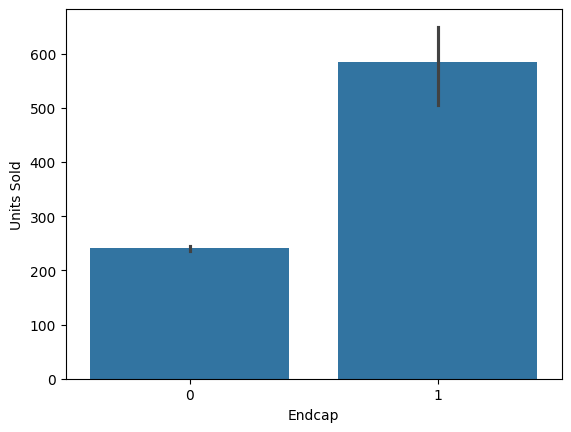

In [97]:
sns.barplot(data=goodbelly, x='Endcap', y='Units Sold')

**Demo Vs Units Sold**

<Axes: xlabel='Demo', ylabel='Units Sold'>

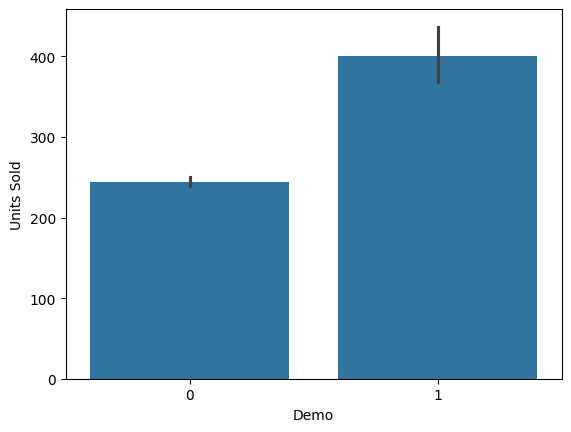

In [98]:
sns.barplot(data=goodbelly, x='Demo', y='Units Sold')

**Demo 1-3 Vs Units Sold**

<Axes: xlabel='Demo1-3', ylabel='Units Sold'>

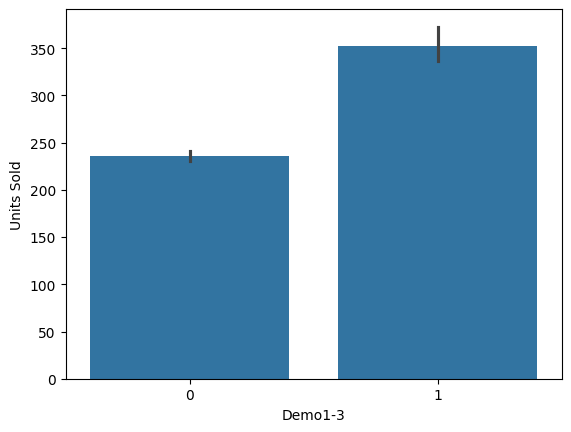

In [99]:
sns.barplot(data=goodbelly, x='Demo1-3', y='Units Sold')

**Demo 4-5 Vs Units Sold**

<Axes: xlabel='Demo4-5', ylabel='Units Sold'>

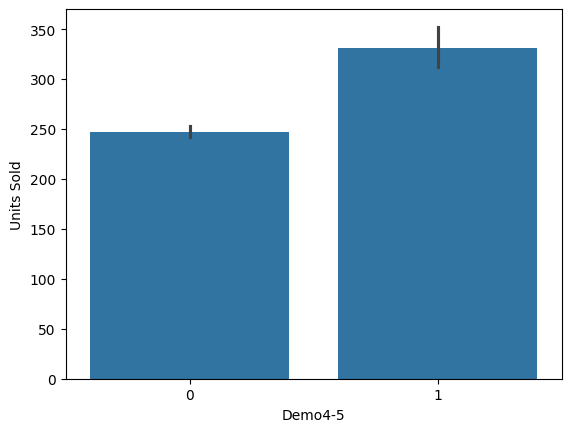

In [100]:
sns.barplot(data=goodbelly, x='Demo4-5', y='Units Sold')

**Natural Retailers Vs Units Sold**

<Axes: xlabel='Natural', ylabel='Units Sold'>

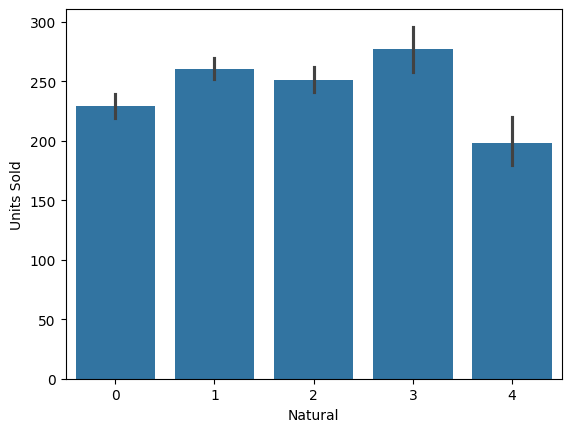

In [101]:
sns.barplot(data=goodbelly, x='Natural', y='Units Sold')
# Stores with 4 natural stores within 5 miles then the unit sales are seen to go down
# since correlation is low the variable is not statistically significant

**Fitness Vs Units Sold**

<Axes: xlabel='Fitness', ylabel='Units Sold'>

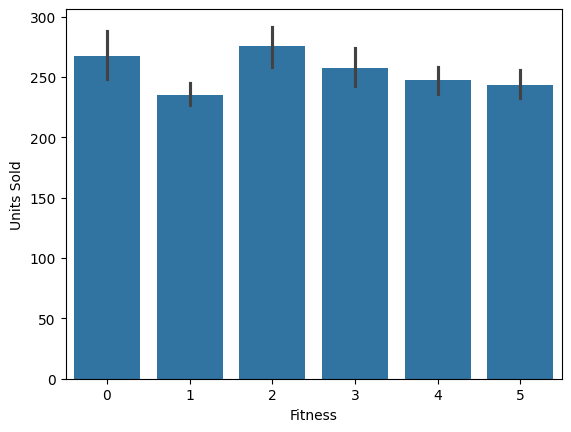

In [102]:
sns.barplot(data=goodbelly, x='Fitness', y='Units Sold')

**Model Building**

In [103]:
goodbelly.head()

,Date,Region,Store,Units Sold,Average Retail Price,Sales Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness,Log_AvgRtlPrice,Day_of_week,Lag_Sales
0,2010-05-04,FL,Biscayne (aka Aventura),150.702088,4.390000,0,0,0,0,0,1,0,1.479329,1,0.000000
1,2010-05-11,FL,Biscayne (aka Aventura),197.403797,3.997692,0,0,0,0,0,1,0,1.385717,1,150.702088
2,2010-05-18,FL,Biscayne (aka Aventura),235.106171,3.809231,0,0,0,0,0,1,0,1.337427,1,197.403797
3,2010-05-25,FL,Biscayne (aka Aventura),226.692427,3.835000,0,0,0,0,0,1,0,1.344169,1,235.106171
4,2010-06-01,FL,Biscayne (aka Aventura),257.688151,3.902500,0,0,0,0,0,1,0,1.361617,1,226.692427


**Rescale the features so all variables are within the same scaler range of 0 to 1**

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#apply scaler() to all the columns except the dummy variables
num_var = ['Units Sold','Average Retail Price','Sales Rep','Endcap','Demo','Demo1-3','Demo4-5','Natural','Fitness']

goodbelly[num_var] = scaler.fit_transform(goodbelly[num_var])
goodbelly.head()

,Date,Region,Store,Units Sold,Average Retail Price,Sales Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness,Log_AvgRtlPrice,Day_of_week,Lag_Sales
0,2010-05-04,FL,Biscayne (aka Aventura),0.103802,0.446342,0.0,0.0,0.0,0.0,0.0,0.25,0.0,1.479329,1,0.000000
1,2010-05-11,FL,Biscayne (aka Aventura),0.150803,0.329662,0.0,0.0,0.0,0.0,0.0,0.25,0.0,1.385717,1,150.702088
2,2010-05-18,FL,Biscayne (aka Aventura),0.188747,0.273610,0.0,0.0,0.0,0.0,0.0,0.25,0.0,1.337427,1,197.403797
3,2010-05-25,FL,Biscayne (aka Aventura),0.180279,0.281274,0.0,0.0,0.0,0.0,0.0,0.25,0.0,1.344169,1,235.106171
4,2010-06-01,FL,Biscayne (aka Aventura),0.211473,0.301350,0.0,0.0,0.0,0.0,0.0,0.25,0.0,1.361617,1,226.692427


**Model 1**

Run linear regression model with variables 'Average Retail Price','Sales Rep','Endcap','Demo','Demo1-3','Demo4-5','Natural','Fitness' and 'Lag_Sales' against 'Units Sold'


In [105]:
# Assign the feature variable to x
x = goodbelly[['Average Retail Price','Sales Rep','Endcap','Demo','Demo1-3','Demo4-5','Natural','Fitness','Lag_Sales']]

# Assign the feature variable to y
y = goodbelly['Units Sold']

import statsmodels.api as sm
x = sm.add_constant(x)
lm1 = sm.OLS(y,x).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     334.8
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:36:00   Log-Likelihood:                 1875.6
No. Observations:                1386   AIC:                            -3731.
Df Residuals:                    1376   BIC:                            -3679.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1375 

In [106]:
# Assign the feature variable to x
x = goodbelly[['Average Retail Price','Sales Rep','Endcap','Demo','Demo1-3','Demo4-5','Lag_Sales']]

# Assign the feature variable to y
y = goodbelly['Units Sold']

import statsmodels.api as sm
x = sm.add_constant(x)
lm1 = sm.OLS(y,x).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:36:00   Log-Likelihood:                 1874.9
No. Observations:                1386   AIC:                            -3734.
Df Residuals:                    1378   BIC:                            -3692.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1335 

### Build a statistical model to explain the relationship between sales and promotional efforts and interpret the regression output.


P-Value:

As per this model the p values of all the involved variables are zero that
makes these variables statistically significant.

R-Square Value:

In this model we can see that R-square value is also higher making this model
predicts the outcome of the dependent variable in a better way

Linear Equation from the model:

`Units Sold = 0.1345 + 0.0681*Sales Rep + 0.3123*Endcap + 0.1115*Demo + 0.0776*Demo1-3 + 0.0661*Demo4-5`

We can see that there is a positive correlation between the Units Sold and the pormotional efforts

In [107]:
x = goodbelly[['Sales Rep','Endcap','Demo','Demo1-3','Demo4-5']]

# Assign the feature variable to y
y = goodbelly['Units Sold']

import statsmodels.api as sm
x = sm.add_constant(x)
lm2 = sm.OLS(y,x).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     535.2
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          6.22e-320
Time:                        20:36:00   Log-Likelihood:                 1818.9
No. Observations:                1386   AIC:                            -3626.
Df Residuals:                    1380   BIC:                            -3594.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1345      0.003     50.686      0.0

### Does the in-store demo program boost the sales? If so, for how long does the sales lift last?

From the below barplots we can see that there was indeed a boost in the sales due to the in-store demo programs. Based on our analysis, we suggest the demo program to be organized weekly since the Demo variable is showing a higher variation than the Demo1-3 and Demo4-5.

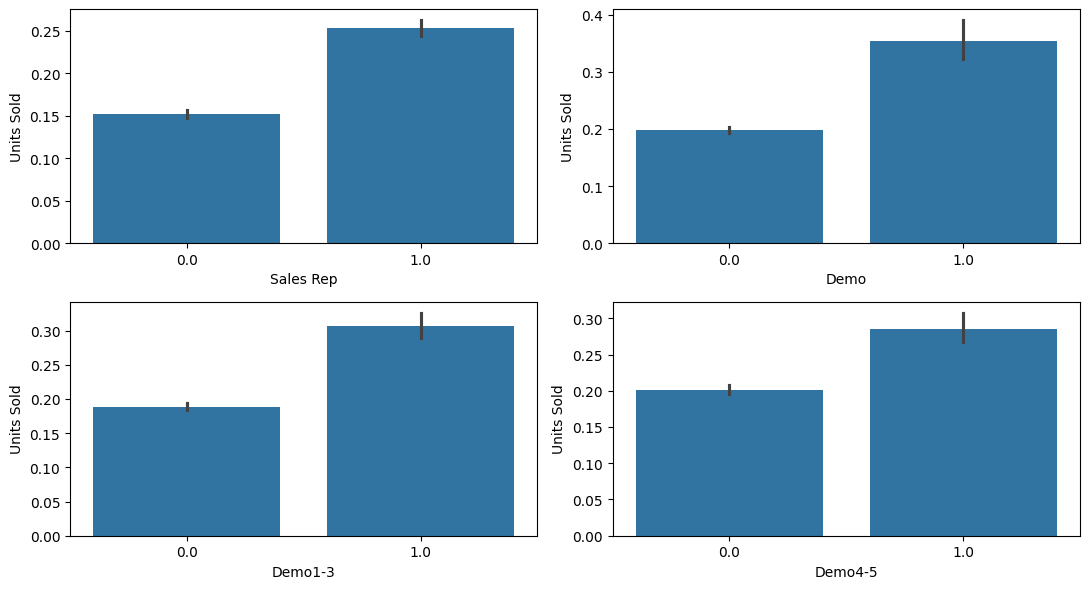

In [108]:
fig, axs =plt.subplots(2,2,figsize=(11,6))
plt11 = sns.barplot(data = goodbelly, x='Sales Rep', y='Units Sold', ax = axs[0,0])
plt12 = sns.barplot(data = goodbelly, x='Demo', y='Units Sold', ax = axs[0,1])
plt13 = sns.barplot(data = goodbelly, x='Demo1-3', y='Units Sold', ax = axs[1,0])
plt14 = sns.barplot(data = goodbelly, x='Demo4-5', y='Units Sold', ax = axs[1,1])
plt.tight_layout()

### Does the placement of the product within the store affect the sales?

Yes, from the below regression model and the barplot, it is evident that the placement of the product within the store has a positive correlation against the sales.

In [109]:
x = goodbelly['Endcap']
y = goodbelly['Units Sold']
print("The correlation between the placement of the products within the store and the sales is =",round(x.corr(y),2))

The correlation between the placement of the products within the store and the sales is = 0.59


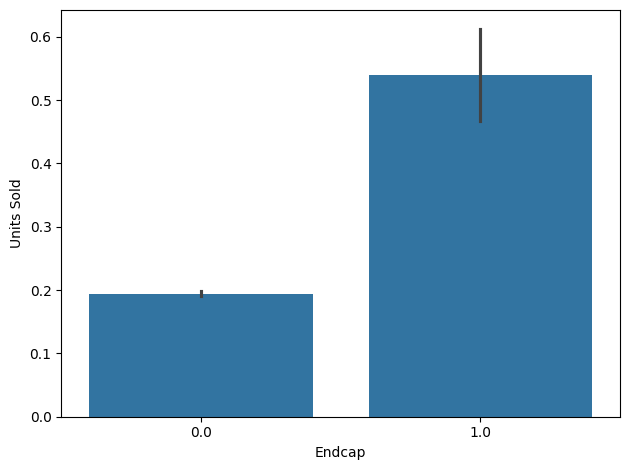

In [110]:
sns.barplot(data = goodbelly, x='Endcap', y='Units Sold')
plt.tight_layout()

### What other factors affect the sales of GoodBelly’s products? Based on the regression output, what are your recommendations to GoodBelly’s management?

From the below mulitple linear regression model we can see that 'Sales Rep','Endcap','Demo','Demo1-3','Demo4-5' and 'Lag_Sales' have a clear positive correlation to the Units Sold. From analyzing the variable 'Natural Retailers' we find that the units sold decreases significantly when the number of such stores are more than 3. Fitness Centers within the 5 mile radius has no significant correlation with the Units sold.

**Recommendations to GoodBelly’s management**

1. Ensure that a Sales Rep is present in those stores having higher foot print.
2. Convince more stores to place GoodBelly products in their End Cap displays and run reward programs for marketing staff who can put up more End Cap displays.
3. Retain a weekly demo frequency to increase the Units sold.
4. Impact of the previous day sales on the current days sales has a very good correlation. It can be repeating customers or customers due to word of mouth. Management should introduce various promotions to boost this kind of a variable.
5. Since Goodbelly has no funds for nationwide advertisement, we recommned to to adopt social media platform and the influencers for promotions.

<Axes: >

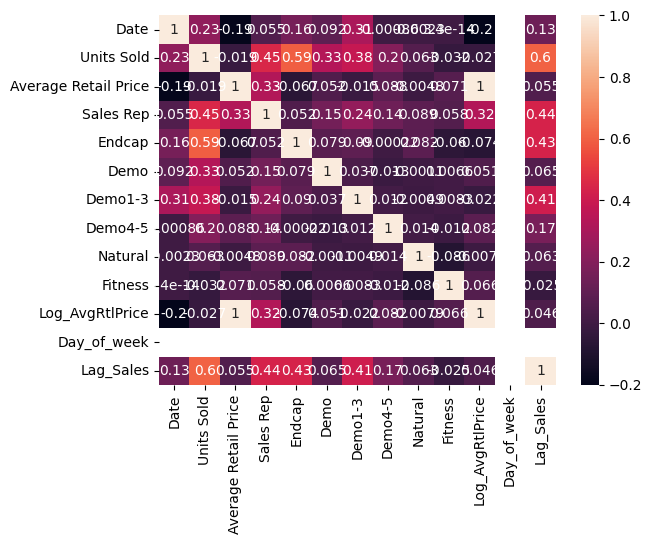

In [111]:
sns.heatmap(goodbelly_numeric.corr(), annot=True)

### Are there any suggestions to improve and refine the model?

1. From the below barplot we can see that the sale reporting is happening only once a week which doesnt give us the information if there was a sale variation during weekdays and weekends. We suggest that the sales representative uploads the sale details every day to improve our model.

2. We also recommend that the sales rep should collect feedback from the customers based on the samples they would have tried to calculate the probability of repeated purchase and include various variables from the feed back in our model.

<Axes: xlabel='Day_of_week', ylabel='Units Sold'>

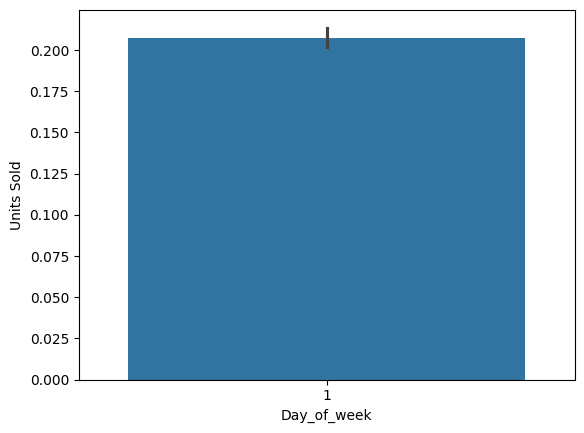

In [112]:
sns.barplot(data = goodbelly,x = 'Day_of_week', y = 'Units Sold')